In [ ]:
%pip install numpy matplotlib scikit-learn gensim

### Visualizing Word Embeddings using PCA and t-SNE
- Model from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM
- Reference: https://github.com/practical-nlp/practical-nlp-code/blob/835096fb83b396d1fac70fb313c294b409b02d7a/Ch3/05_Pre_Trained_Word_Embeddings.ipynb

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

# Load pre-trained word embeddings
# For this example, we're assuming Word2Vec embeddings, but adjust accordingly for others.
model = KeyedVectors.load_word2vec_format(r'/media/bigboy/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
model.most_similar('beautiful')

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.patheffects as PathEffects
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits import mplot3d

from matplotlib.text import Annotation
import warnings
warnings.filterwarnings('ignore')

In [61]:


def similiarTupleToArr(original,similiar):
  return [original] + [word for word, _ in similiar]
def plot_words(words_to_visualize):
  words = []
  for vword in words_to_visualize:
    if model.key_to_index[vword]:
      similar = model.most_similar(vword, topn=3)
      new_words = similiarTupleToArr(vword,similar)
      words.extend(new_words)
  # Extracting the vectors for the words
  word_vectors = np.array([model[word] for word in words])
  plot_vec(word_vectors, words)

def plot_vec(word_vectors, words):
  # Using t-SNE to reduce dimensionality for visualization
  perplexity = max(1, len(words) / 2)
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
  word_vectors_2d = tsne.fit_transform(word_vectors)

  # Plotting the words in 2D space
  plt.figure(figsize=(10, 8))
  plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
  for word, (x, y) in zip(words, word_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word)

  plt.show()
def plot_words_similiar(words_to_visualize, similar_words_count=3, display_similar_count=3):
  words = []
  similiar_words = []
  for vword in words_to_visualize:
    words.append(vword)
    if model.key_to_index[vword] and similar_words_count != 0:
      similar = model.most_similar(vword, topn=similar_words_count)
      #new_words = similiarTupleToArr(vword,similar)
      new_words = [word for word, _ in similar]
      similiar_words.extend(new_words)
  # Extracting the vectors for the words
  word_vectors = np.array([model[word] for word in words])
  similiar_words_vectors = np.array([model[word] for word in similiar_words])
  plot_vec_similiar(word_vectors, words, similiar_words_vectors, similiar_words, similar_words_count, display_similar_count)

def plot_vec_similiar(word_vectors, words, similiar_words_vectors, similiar_words, similar_words_count, display_similar_count, display_plot=True):
  
  # Concatenate the vectors
  if similar_words_count == 0:
    all_vectors = word_vectors
  else:
    all_vectors = np.concatenate((word_vectors, similiar_words_vectors), axis=0)


  # Using t-SNE to reduce dimensionality for visualization
  perplexity = 5#max(1, (len(words) + len(similiar_words)) / 2) # default 30
  learning_rate = 200  # Default is 200
  early_exaggeration = 45.0  # Default is 12.0
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, early_exaggeration=early_exaggeration, learning_rate=learning_rate)
  all_vectors_2d = tsne.fit_transform(all_vectors)

  # Split the transformed vectors back into two arrays
  word_vectors_2d = all_vectors_2d[:len(word_vectors)]
  similiar_words_vectors_2d = all_vectors_2d[len(word_vectors):]

  # Slice the arrays to only include the first display_similar_count elements for each word
  display_similiar_words_vectors_2d = np.array([similiar_words_vectors_2d[i * similar_words_count : i * similar_words_count + display_similar_count] for i in range(len(words))]).reshape(-1, 2)
  display_similiar_words = [similiar_words[i * similar_words_count : i * similar_words_count + display_similar_count] for i in range(len(words))]


  # Plotting the words in 2D space
  if display_plot:
    plt.figure(figsize=(10, 8))
  plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
  #plt.scatter(similiar_words_vectors_2d[:, 0], similiar_words_vectors_2d[:, 1], edgecolors='k', c='b')
  plt.scatter(display_similiar_words_vectors_2d[:, 0], display_similiar_words_vectors_2d[:, 1], edgecolors='k', c='b')
  for i, word in enumerate(words):
    word_x, word_y = word_vectors_2d[i]
    for j in range(min(similar_words_count, display_similar_count)):
        similar_word_index = i * similar_words_count + j
        similar_word_x, similar_word_y = similiar_words_vectors_2d[similar_word_index]
        plt.plot([word_x, similar_word_x], [word_y, similar_word_y], 'g-')

  
  for i, word in enumerate(words):
    for j in range(min(similar_words_count, display_similar_count)):
        similar_word_index = i * similar_words_count + j
        similar_word_x, similar_word_y = similiar_words_vectors_2d[similar_word_index]
        plt.text(similar_word_x - 8.05, similar_word_y + 10.05, similiar_words[similar_word_index], fontsize=15, color='white', 
                 path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])
  for word, (x, y) in zip(words, word_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word, fontsize=15, color='white', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])

  if display_plot:
    plt.show()

In [ ]:
words_to_visualize = ['dawg', 'kat', 'byrd', 'phish', 'Nicholas_Cage', 'lambda', 'epsilon']
plot_words_similiar(words_to_visualize, 2,0)
plot_words_similiar(words_to_visualize, 2,1)
plot_words_similiar(words_to_visualize, 2, 2)
#plot_words_similiar(words_to_visualize, 3, 3)

In [171]:
def find_analogous_word(base_positive, base_negative=None, target_positive=None, target_negative=None):
  if target_negative == None:
    target_negative = base_positive
  # cursed, result_vector is read only
  if base_negative is not None and target_positive is not None:
    result_vector = model[base_positive] - model[base_negative] + model[target_positive]
  if base_negative is not None and target_positive is None:
    result_vector = model[base_positive] - model[base_negative]
  if base_negative is None and target_positive is not None:
    result_vector = model[base_positive] + model[target_positive]
  if base_negative is None and target_positive is None:
    result_vector = model[base_positive]
  #result_vector = model[base_positive] - model[base_negative] + model[target_positive]
  most_similar = model.most_similar(positive=[result_vector], negative=[target_negative])
  return (most_similar).copy()

# vector('king') - vector('man') + vector('woman')
# get the vector for 'king' and subtract the vector for 'man', then add 'woman'
find_analogous_word('king', 'man', 'woman')
find_analogous_word('Paris', 'France', 'Australia')
find_analogous_word('king', 'man')


[('kings', 0.35701310634613037),
 ('Pansy_Ho_Chiu', 0.3446417450904846),
 ('queen', 0.32402288913726807),
 ('kingdom', 0.3127850294113159),
 ('royal_palace', 0.30866166949272156),
 ('Savory_aromas_wafted', 0.301236093044281),
 ('monarchy', 0.29730209708213806),
 ('du_Grand_Controle', 0.29715752601623535),
 ('King_Gyanendra', 0.29691657423973083),
 ('princes', 0.29642924666404724)]

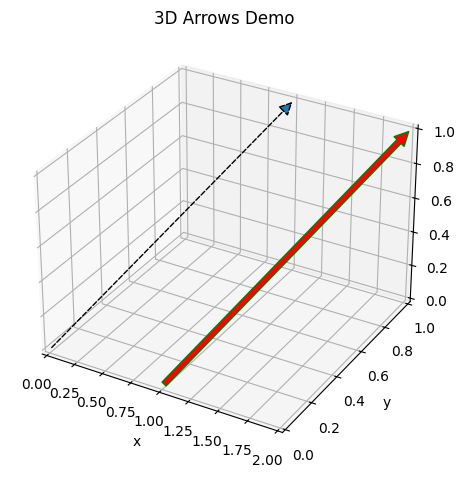

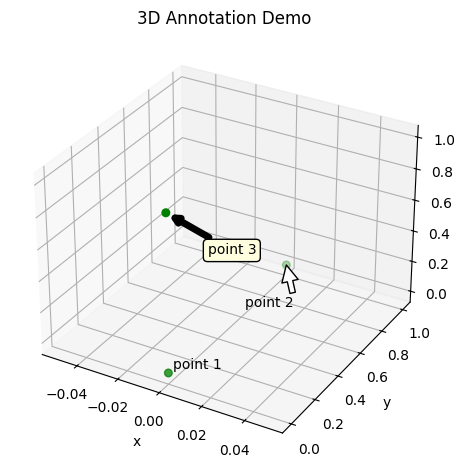

In [103]:
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)
def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

# https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
from matplotlib.patches import FancyArrowPatch
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 

def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
  '''Add an 3d arrow to an `Axes3D` instance.'''
  arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
  ax.add_artist(arrow)

setattr(Axes3D, 'arrow3D', _arrow3D)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,2)
ax.arrow3D(0,0,0,
           1,1,1,
           mutation_scale=20,
           arrowstyle="-|>",
           linestyle='dashed')
ax.arrow3D(1,0,0,
           1,1,1,
           mutation_scale=20,
           ec ='green',
           fc='red')
ax.set_title('3D Arrows Demo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.tight_layout()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# adding a few 3d points to annotate
ax.scatter([0, 0, 0], [0, 0, 1], [0, 1, 0], s=30, marker='o', color='green')
ax.annotate3D('point 1', (0, 0, 0), xytext=(3, 3), textcoords='offset points')
ax.annotate3D('point 2', (0, 1, 0),
              xytext=(-30, -30),
              textcoords='offset points',
              arrowprops=dict(ec='black', fc='white', shrink=2.5))
ax.annotate3D('point 3', (0, 0, 1),
              xytext=(30, -30),
              textcoords='offset points',
              bbox=dict(boxstyle="round", fc="lightyellow"),
              arrowprops=dict(arrowstyle="-|>", ec='black', fc='white', lw=5))
ax.set_title('3D Annotation Demo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.tight_layout()

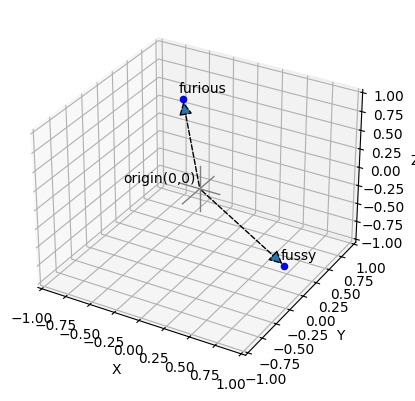

In [318]:
fig = plt.figure()
dimension = 1
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-dimension, dimension])
ax.set_ylim([-dimension, dimension])
ax.set_zlim([-dimension, dimension])
axis_length = 0.3
modify = 0.1
ax.plot3D([0, 0], [0, 0], [-axis_length, axis_length], 'k-', color='grey', linestyle='-', linewidth=1)
ax.plot3D([0, 0], [-axis_length, axis_length-0.05], [0, 0], 'k-', color='grey', linestyle='-', linewidth=1)
ax.plot3D([-axis_length+modify, axis_length-modify], [0, 0], [0, 0], 'k-', color='grey', linestyle='-', linewidth=1)

# Your labeled points
points = {
    'furious': [-0.7, 0.9, 0.4],
    'fussy': [0.8, 0.1, -0.8]
}

# Plot each point and add a label
for label, coords in points.items():
    ax.scatter(*coords, color='blue')
    ax.annotate3D(label, coords, xytext=(-3,3), textcoords='offset points', ha='left',va='bottom')
    ax.arrow3D(0, 0, 0, *coords, mutation_scale=20, arrowstyle="-|>", linestyle='dashed')
ax.annotate3D('origin(0,0)', (0, 0, 0), xytext=(-3,3), textcoords='offset points', ha='right',va='bottom')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [294]:

def plot_word_embeddings(words, vectors, arrowCount=0, dimensions=2, labelCount=None):
    # Get the word embeddings for a list of words
    if labelCount is None:
        labelCount = len(words)
    

    # Use PCA to reduce the dimensionality to 3D
    pca = PCA(n_components=3)
    vectors_3d = pca.fit_transform(vectors)

    # Use T-SNE to reduce the dimensionality to 3D
    #tsne = TSNE(n_components=3, random_state=0)
    #vectors_3d = tsne.fit_transform(vectors)

    #perplexity = 1#max(1, (len(words) + len(similiar_words)) / 2) # default 30
    #learning_rate = 200  # Default is 200
    #early_exaggeration = 12.0  # Default is 12.0
    #tsne = TSNE(n_components=3, random_state=0, perplexity=perplexity, early_exaggeration=early_exaggeration, learning_rate=learning_rate)
    #vectors_3d = tsne.fit_transform(vectors)

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # Set the limits of the axes
    ax.set_xlim([-dimensions, dimensions])
    ax.set_ylim([-dimensions, dimensions])
    ax.set_zlim([-dimensions, dimensions])
    # Annotate the points with the words and draw arrows between them
    axis_length = 0.3
    modify = 0.1
    ax.plot3D([0, 0], [0, 0], [-axis_length, axis_length], 'k-', color='grey', linestyle='-', linewidth=1)
    ax.plot3D([0, 0], [-axis_length, axis_length-0.05], [0, 0], 'k-', color='grey', linestyle='-', linewidth=1)
    ax.plot3D([-axis_length+modify, axis_length-modify], [0, 0], [0, 0], 'k-', color='grey', linestyle='-', linewidth=1)

    ax.scatter(vectors_3d[:, 0], vectors_3d[:, 1], vectors_3d[:, 2], marker='o')

    for i, word in enumerate(words):
        if i > 0 and i <= arrowCount - 1:
            ax.arrow3D(vectors_3d[i-1, 0], vectors_3d[i-1, 1], vectors_3d[i-1, 2],
                       vectors_3d[i, 0] - vectors_3d[i-1, 0],
                       vectors_3d[i, 1] - vectors_3d[i-1, 1],
                       vectors_3d[i, 2] - vectors_3d[i-1, 2],
                       mutation_scale=20,
                       arrowstyle="-|>",
                       linestyle='dashed')
        if i < labelCount:
          ax.annotate3D(word, (vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2]), 
                      xytext=(3, 3), textcoords='offset points')
    
    plt.show()

[('king', 0.7763121128082275), ('woman', 0.7248649597167969), ('queen', 0.6532525420188904), ('man', 0.6465083360671997), ('princess', 0.6117674112319946), ('monarch', 0.6013033390045166), ('prince', 0.5994522571563721), ('girl', 0.5961079597473145), ('crown_prince', 0.563805341720581), ('boy', 0.555942714214325)]
[('queen', 0.9999999403953552), ('queens', 0.7399441599845886), ('princess', 0.7070533037185669), ('king', 0.6510956883430481), ('monarch', 0.6383600234985352), ('very_pampered_McElhatton', 0.6357026696205139), ('Queen', 0.6163407564163208), ('NYC_anglophiles_aflutter', 0.6060678958892822), ('Queen_Consort', 0.5923795700073242), ('princesses', 0.5908074378967285)]


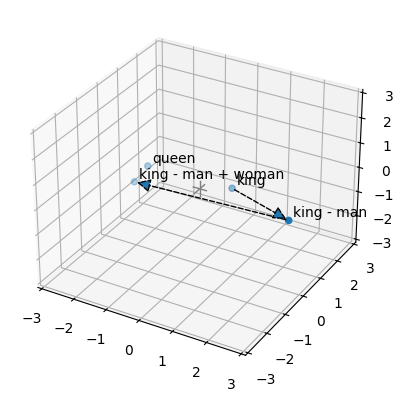

In [295]:
king = model['king']
kingminusman = model['king'] - model['man']
kingminusmanpluswoman = model['king'] + model['woman']
analo_word = model.similar_by_vector(kingminusmanpluswoman)

model.most_similar(positive=[kingminusmanpluswoman])

print(analo_word)
print(model.similar_by_vector(model['queen']))

labels = ['king', 'king - man', 'king - man + woman', 'queen' ]

kingminusmanpluswomanoffset =  model['king'] + model['woman'] - model['her'] * 0.3


vectors = np.array([model['king'], kingminusman, kingminusmanpluswoman, kingminusmanpluswomanoffset])
plot_word_embeddings(labels, vectors, len(labels) - 1, 3)
#plot_word_embeddings(labels, [model['king'], model['king'], model['king'], model['king']], len(labels) - 1, 3)

#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 1)
#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 2)
#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 3)
#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 4)

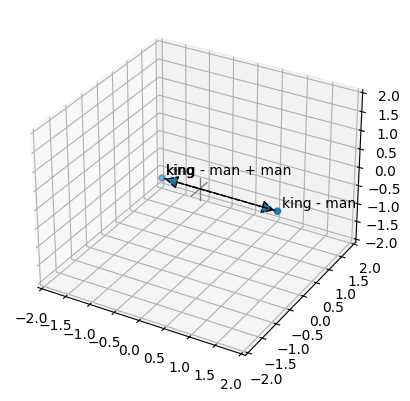

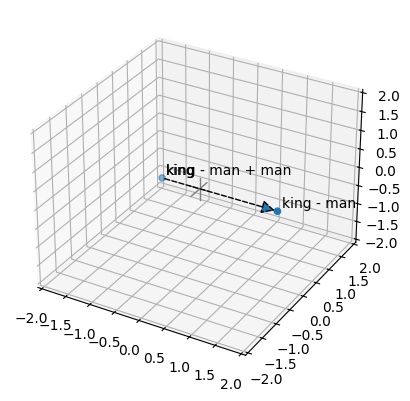

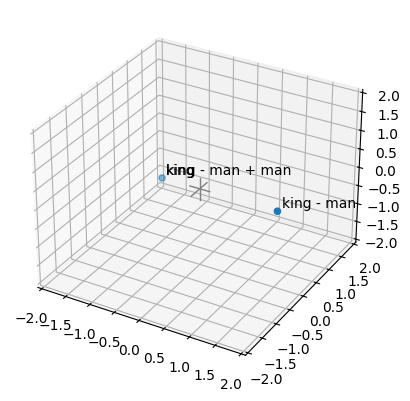

In [290]:
king = model['king']
kingminusman = (model['king'] - model['man']).copy()
kingagain = kingminusman + model['man']
labels = ['king', 'king - man', 'king - man + man']
vectors = [king, kingminusman, kingagain]
for i, label in enumerate(labels):
  plot_word_embeddings(labels, vectors, len(labels) - i)

[('king', 0.8449392914772034), ('queen', 0.730051577091217), ('monarch', 0.6454662084579468), ('princess', 0.6156250834465027), ('crown_prince', 0.5818676948547363), ('prince', 0.5777117013931274), ('kings', 0.561366617679596), ('sultan', 0.5376775860786438), ('Queen_Consort', 0.5344247221946716), ('queens', 0.5289887189865112)]
0


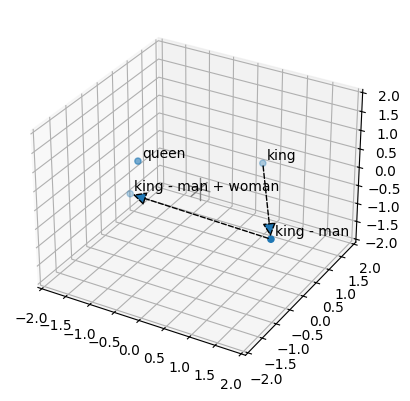

1


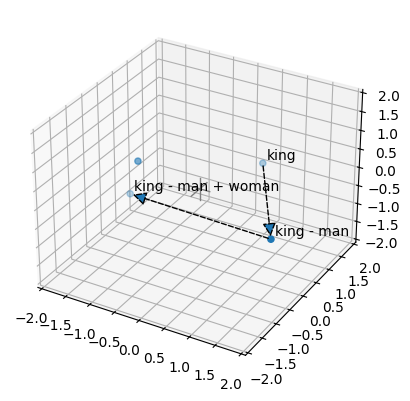

2


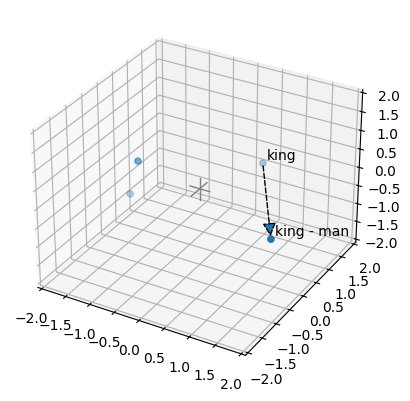

3


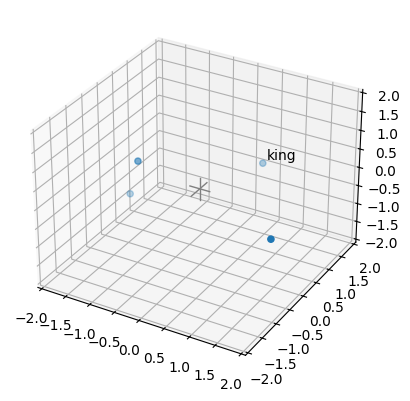

In [310]:
king = model['king']
kingminusman = (model['king'] - model['man']).copy()
kingminusmanpluswoman = kingminusman + model['woman']
analo_word = model.similar_by_vector(kingminusmanpluswoman)

#analo_word = model.most_similar(positive=[kingminusmanpluswoman], negative=['king'])
print(analo_word)
labels = ['king', 'king - man', 'king - man + woman', 'queen']
#print(model['king'], analo_word)

vectors = [model['king'], kingminusman, model['queen'], model['queen'] - model['her'] * 0.6]
for i, label in enumerate(labels):
  print(i)
  arrowCount = len(labels) - (i)
  if(i == 0):
    arrowCount = arrowCount -1
  plot_word_embeddings(labels, vectors, arrowCount, 2,len(labels) - (i))
#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 1)
#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 2)
#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 3)
#plot_word_embeddings(['king', 'man', 'woman', analo_word[0][0]], 4)

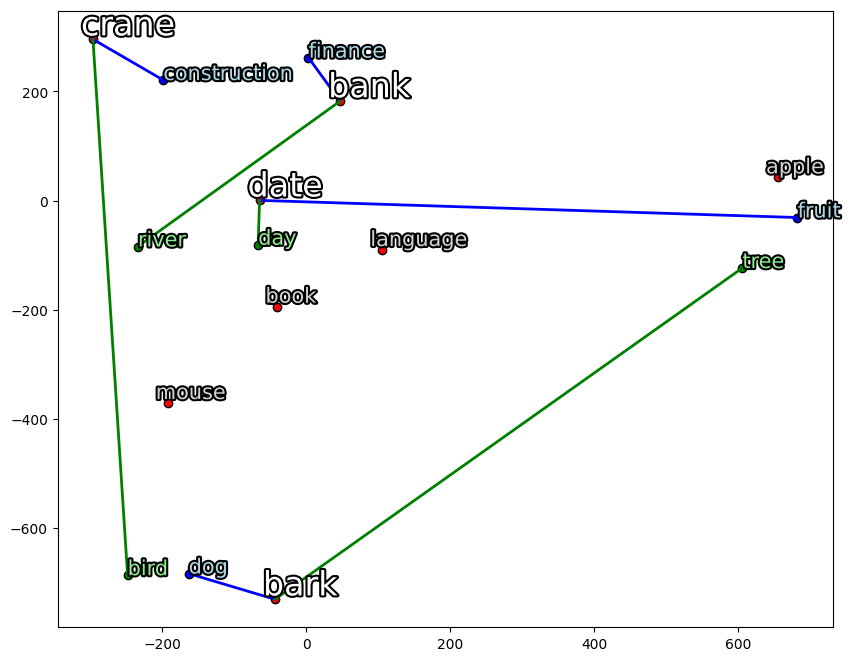

In [151]:

def plot_vec_similiar_polysemy_homonymy(word_vectors, words, similiar_words1_vectors, similiar_words1, similiar_words2_vectors, similiar_words2):
  
  all_vectors = np.concatenate((word_vectors, similiar_words1_vectors, similiar_words2_vectors), axis=0)

  # Using t-SNE to reduce dimensionality for visualization
  perplexity = 2#max(1, (len(words) + len(similiar_words)) / 2) # default 30
  learning_rate = 200  # Default is 200
  early_exaggeration = 45.0  # Default is 12.0
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity, early_exaggeration=early_exaggeration, learning_rate=learning_rate)
  all_vectors_2d = tsne.fit_transform(all_vectors)

  # Split the transformed vectors back into three arrays
  word_vectors_2d = all_vectors_2d[:len(word_vectors)]
  similiar_words1_vectors_2d = all_vectors_2d[len(word_vectors):len(word_vectors)+len(similiar_words1)]
  similiar_words2_vectors_2d = all_vectors_2d[len(word_vectors)+len(similiar_words1):]


  # Plotting the words in 2D space
  plt.figure(figsize=(10, 8))
  plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
  plt.scatter(similiar_words1_vectors_2d[:, 0], similiar_words1_vectors_2d[:, 1], edgecolors='k', c='b')
  plt.scatter(similiar_words2_vectors_2d[:, 0], similiar_words2_vectors_2d[:, 1], edgecolors='k', c='g')
  
  for i, word in enumerate(similiar_words1):
    word_x, word_y = word_vectors_2d[i]
    similar_word_index = i 
    similar_word_x, similar_word_y = similiar_words1_vectors_2d[similar_word_index]
    plt.plot([word_x, similar_word_x], [word_y, similar_word_y], 'b-', linewidth=2.0)
  
  for i, word in enumerate(similiar_words2):
    word_x, word_y = word_vectors_2d[i]
    similar_word_index = i 
    similar_word_x, similar_word_y = similiar_words2_vectors_2d[similar_word_index]
    plt.plot([word_x, similar_word_x], [word_y, similar_word_y], 'g-', linewidth=2.0)

  i = 0
  for word, (x, y) in zip(words, word_vectors_2d):
    if i >= min(len(similiar_words1), len(similiar_words2)):
      plt.text(x - 16.65, y + 7.15, word, fontsize=15, color='lightgray', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])
    else:
      plt.text(x - 16.65, y + 7.15, word, fontsize=24, color='white', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])
    i += 1

  for word, (x, y) in zip(similiar_words1, similiar_words1_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word, fontsize=15, color='lightblue', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])

  for word, (x, y) in zip(similiar_words2, similiar_words2_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word, fontsize=15, color='lightgreen', 
             path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')])

  plt.show()

#words_to_visualize = ['bat', 'crane', 'mouse', 'apple']
#
## similiar words to first meaning
#similiar1 = ['baseball', 'construction', 'computer', 'company']
#similiar2 = ['cave', 'bird', 'rodent', 'fruit']
  
words_to_visualize = ['crane', 'bark', 'bank', 'date', 'mouse', 'apple', 'language', 'book']
similiar1 = ['construction', 'dog', 'finance', 'fruit']
similiar2 = ['bird', 'tree', 'river', 'day']

#tempSimiliar = []
#combined_list = words_to_visualize + similiar1 + similiar2
#
#for word in combined_list:
#  sim = model.most_similar(word, topn=1)
#  # add it to the list
#  tempSimiliar.append(sim[0])
#
#words_to_visualize.extend([word for word, _ in tempSimiliar])

word_vectors = np.array([model[word] for word in words_to_visualize])
similiar1_words_vectors = np.array([model[word] for word in similiar1])
similiar2_words_vectors = np.array([model[word] for word in similiar2])

plot_vec_similiar_polysemy_homonymy(word_vectors, words_to_visualize, similiar1_words_vectors, similiar1, similiar2_words_vectors, similiar2)


In [ ]:
words_to_visualize = ['light', 'bank', 'date', 'mouse', 'apple', 'language', 'book']
similiar1 = ['lightweight',  'finance', 'dating']
similiar2 = ['delicate', 'trust', 'calendar']

word_vectors = np.array([model[word] for word in words_to_visualize])
similiar1_words_vectors = np.array([model[word] for word in similiar1])
similiar2_words_vectors = np.array([model[word] for word in similiar2])

plot_vec_similiar_polysemy_homonymy(word_vectors, words_to_visualize, similiar1_words_vectors, similiar1, similiar2_words_vectors, similiar2)

In [ ]:


# Examples of polysemous words and how word2vec cant distinguish between them

# Polysemous words
words_to_visualize = ['bat', 'crane', 'mouse', 'apple']

# similiar words to first meaning
similiar1 = ['baseball', 'construction', 'computer', 'company']
# similiar words to second meaning
similiar2 = ['cave', 'bird', 'rodent', 'fruit', 'after']

word_vectors = np.array([model[word] for word in words_to_visualize])
similiar1_words_vectors = np.array([model[word] for word in similiar1])
similiar2_words_vectors = np.array([model[word] for word in similiar2])
plot_vec_similiar(word_vectors, words_to_visualize, similiar1_words_vectors, similiar1, 1, 1, False)
plot_vec_similiar(word_vectors, words_to_visualize, similiar2_words_vectors, similiar2, 1, 1, False)

In [ ]:
words_to_visualize = ['king', 'queen', 'beautiful', 'dog', 'banana', 'rock', 'tree', 'blue', 'hawaii']
plot_words(words_to_visualize)

In [ ]:
# Nick Cage
Nick_OSphere = model.most_similar('Nicholas_Cage', topn=100)
words_to_visualize = similiarTupleToArr('Nicholas_Cage',Nick_OSphere)
plot_words(words_to_visualize)

In [ ]:
# display a bar chart of the most similar words
similar_words = Nick_OSphere#model.most_similar('beautiful', topn=10)
words = [word for word, _ in similar_words]
scores = [score for _, score in similar_words]
# increase spacing on labels for readability
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.bar(words, scores)

In [ ]:
# user input to test if words are in the model vocabulary
word = input('Enter a word: ')
if word in model.key_to_index:
  words = model.most_similar(word, topn=10)
  
  print(words)
  plot_words([word, "taxes"] + [word for word, _ in words], 0)
else:
  print('Word not in vocabulary')

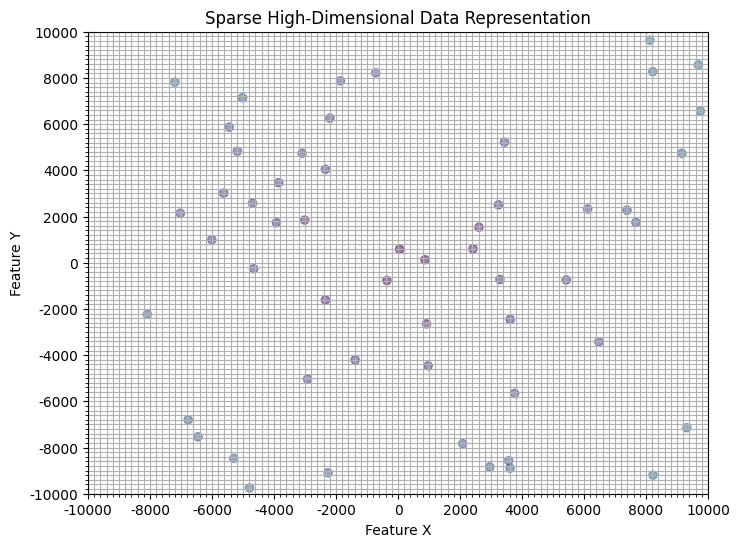

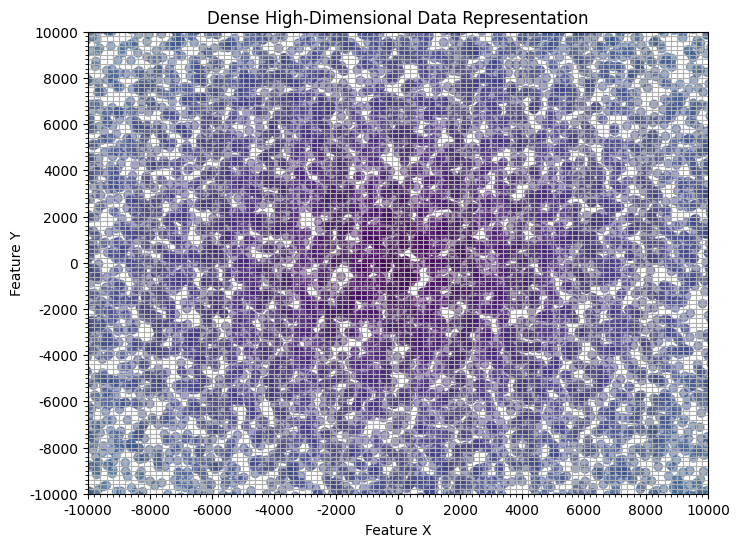

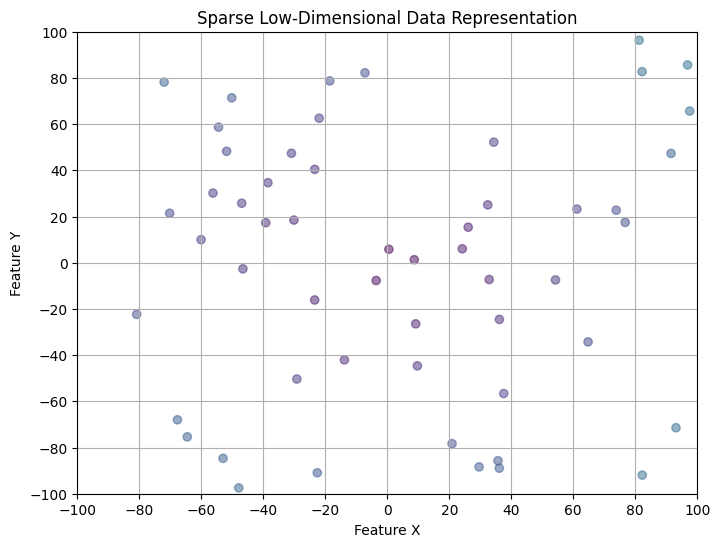

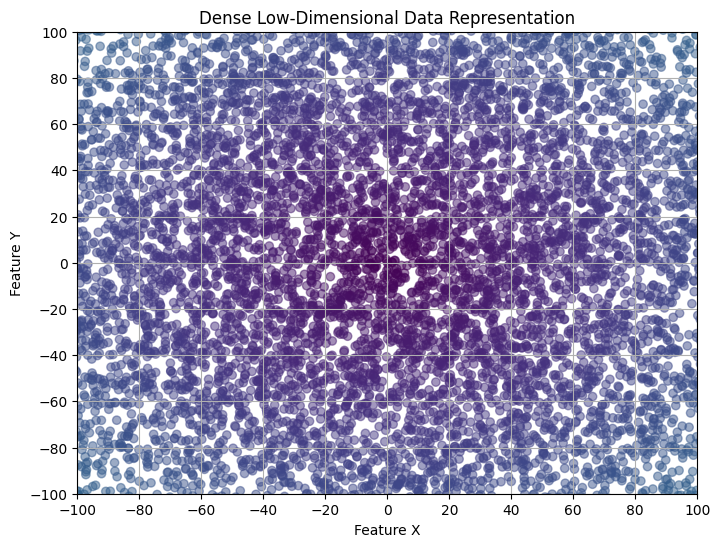

In [352]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import viridis
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

def plot_dimensional_diagram(sparse=True, high_dimensional=True):
    """
    Plot a representation of sparse & high-dimensional data with radial gradient color coding.
    
    Parameters:
    - sparse (bool): If True, plot the data as sparse.
    - high_dimensional (bool): If True, zoom out to imply a high-dimensional feature space.
    """
    # Seed for reproducibility
    np.random.seed(42)
    size_str = 'Sparse' if sparse else 'Dense'
    dim_str = 'High-Dimensional' if high_dimensional else 'Low-Dimensional'
    
    # Generate data
    points = 100 if sparse else 15000
    dimension_range = 10000 if high_dimensional else 100
    
    # Generate random points
    x = np.random.randn(points) * dimension_range
    y = np.random.randn(points) * dimension_range
    
    # Calculate distances for color coding
    distances = np.sqrt(x**2 + y**2)
    norm = Normalize(vmin=min(distances), vmax=max(distances))
    colors = viridis(norm(distances))
    
    # Plot
    plt.figure(figsize=(8, 6))
    
    #plt.colorbar(label='Distance from Origin (Dimensionality Indicator)')
    plt.xlim(-dimension_range, dimension_range)
    plt.ylim(-dimension_range, dimension_range)
    

    # Setting grid and labels
    ax = plt.gca()  # Get current axes
    if high_dimensional:
      # Set minor ticks to show grid every 20
      ax.xaxis.set_minor_locator(MultipleLocator(dimension_range // 50))
      ax.yaxis.set_minor_locator(MultipleLocator(dimension_range // 50))
      
      # Set major ticks to label every 100
      ax.xaxis.set_major_locator(MultipleLocator(dimension_range // 5))
      ax.yaxis.set_major_locator(MultipleLocator(dimension_range // 5))
      ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
      ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
      #plt.xticks(np.arange(-dimension_range, dimension_range + 1, round(20)))
      #plt.yticks(np.arange(-dimension_range, dimension_range + 1, round(20)))
    else:
      plt.xticks(np.arange(-dimension_range, dimension_range + 1, dimension_range // 5))
      plt.yticks(np.arange(-dimension_range, dimension_range + 1, dimension_range // 5))
    
    
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'{size_str} {dim_str} Data Representation')
    plt.scatter(x, y, alpha=0.5, c=colors)
    plt.grid(which='both')
    
    plt.show()

# Example usage
plot_dimensional_diagram(sparse=True, high_dimensional=True)
plot_dimensional_diagram(sparse=False, high_dimensional=True)
plot_dimensional_diagram(sparse=True, high_dimensional=False)
plot_dimensional_diagram(sparse=False, high_dimensional=False)


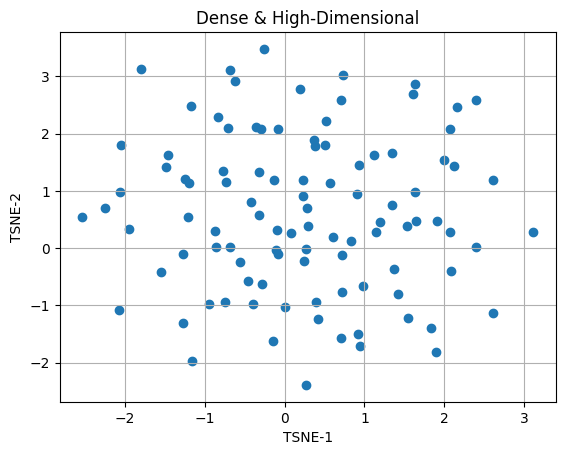

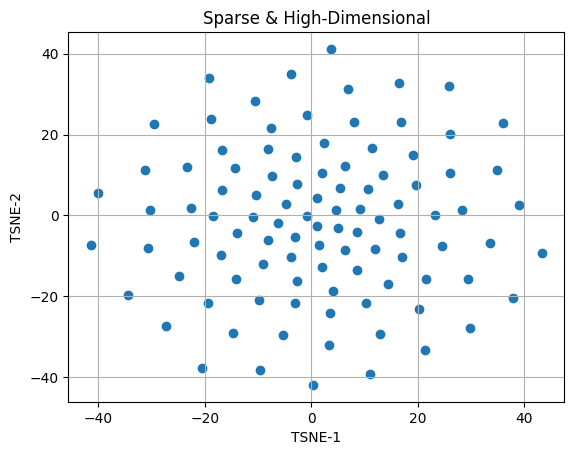

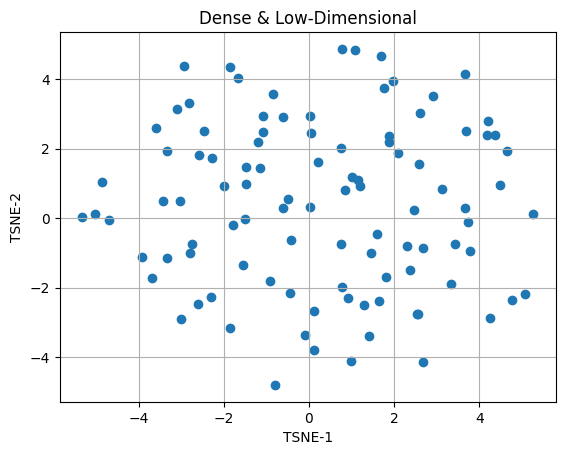

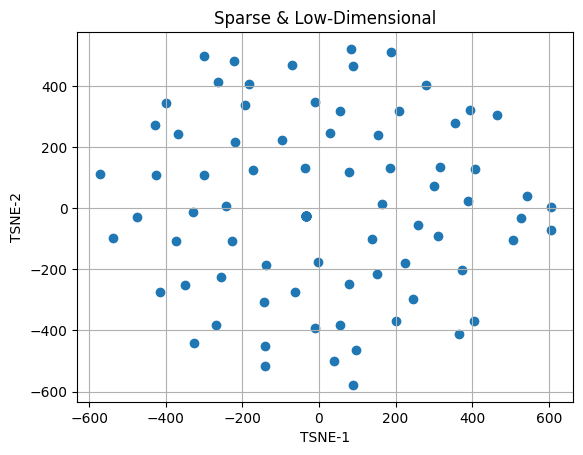

In [1]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def generate_data(points=100, dimensions=300, sparse=False):
    if sparse:
        return np.random.randn(points, dimensions) * np.random.binomial(1, 0.1, (points, dimensions))
    else:
        return np.random.randn(points, dimensions)

def visualize_data(data, title):
    tsne = TSNE(n_components=2, random_state=42)
    transformed_data = tsne.fit_transform(data)
    
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1])
    plt.title(title)
    plt.xlabel('TSNE-1')
    plt.ylabel('TSNE-2')
    plt.grid(True)
    plt.show()

# Generate synthetic data for each category
dense_high_dim = generate_data(sparse=False)
sparse_high_dim = generate_data(sparse=True)
dense_low_dim = generate_data(dimensions=10, sparse=False)
sparse_low_dim = generate_data(dimensions=10, sparse=True)

# Visualize
visualize_data(dense_high_dim, "Dense & High-Dimensional")
visualize_data(sparse_high_dim, "Sparse & High-Dimensional")
visualize_data(dense_low_dim, "Dense & Low-Dimensional")
visualize_data(sparse_low_dim, "Sparse & Low-Dimensional")
